In [16]:
%load_ext autoreload
%autoreload 2  """Reloads all functions automatically"""
%matplotlib inline

from irreversible_stressstrain import StressStrain as strainmodel
import test_suite as suite
import graph_suite as plot
import numpy as np

model = strainmodel('ref/HSRS/222').get_experimental_data()
slopes = suite.get_slopes(model)

strain = model[:,0]
stress = model[:,1]

# -- we think that yield occurs where the standard deviation is decreasing AND the slopes are mostly negative
def findYieldInterval(slopes, numberofsections):
    
    def numneg(val):
        return sum((val<0).astype(int))
    
    # -- divide into ten intervals and save stddev of each
    splitslopes = np.array_split(slopes,numberofsections)
      
    # -- displays the number of negative values in a range (USEFUL!!!)
    for section in splitslopes:
        print numneg(section), len(section)

    divs = [np.std(vals) for vals in splitslopes]
    
    # -- stddev of the whole thing
    stdev = np.std(slopes)
    
    interval = 0
    sect = splitslopes[interval]
    
    print divs, stdev
    
    # -- the proportion of slope values in an interval that must be negative to determine that material yields
    cutoff = 1./2.
    
    while divs[interval] > stdev or numneg(sect)<len(sect)*cutoff:
        
        interval = interval + 1
        
        """Guard against going out of bounds"""
        if interval==len(splitslopes): break
            
        sect = splitslopes[interval]                                         
    
    print interval
    return interval

numberofsections = 25
interval_length = len(model)/numberofsections

"""
Middle of selected interval

Guard against going out of bounds
"""
yield_interval = findYieldInterval(slopes,numberofsections)
yield_index = min(yield_interval*interval_length + interval_length/2,len(strain)-1) 
yield_value = np.array([strain[yield_index],stress[yield_index]])[None,:]

print 
print yield_value

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0 11
0 11
0 11
0 11
0 11
0 11
0 11
0 11
0 10
0 10
0 10
3 10
7 10
2 10
6 10
4 10
4 10
6 10
6 10
6 10
7 10
4 10
4 10
4 10
5 10
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 146.50059254820067, 87.4743749432957, 46.466101579458922, 55.733966484129539, 47.838135881674866, 36.90003925769583, 76.078936851458081, 43.752335906046881, 68.56719046966559, 23.966171744081066, 38.816420717409819, 67.452873935732867, 53.259828923143573, 52.798385065858518] 53.1687787066
18

[[   11.8515712  1013.989076 ]]


## Make these estimates more reliable and robust

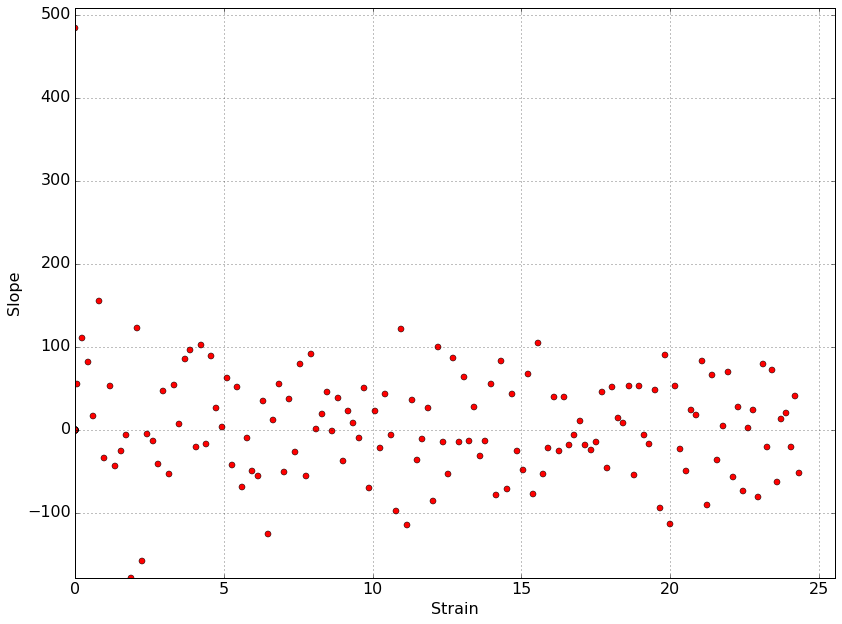

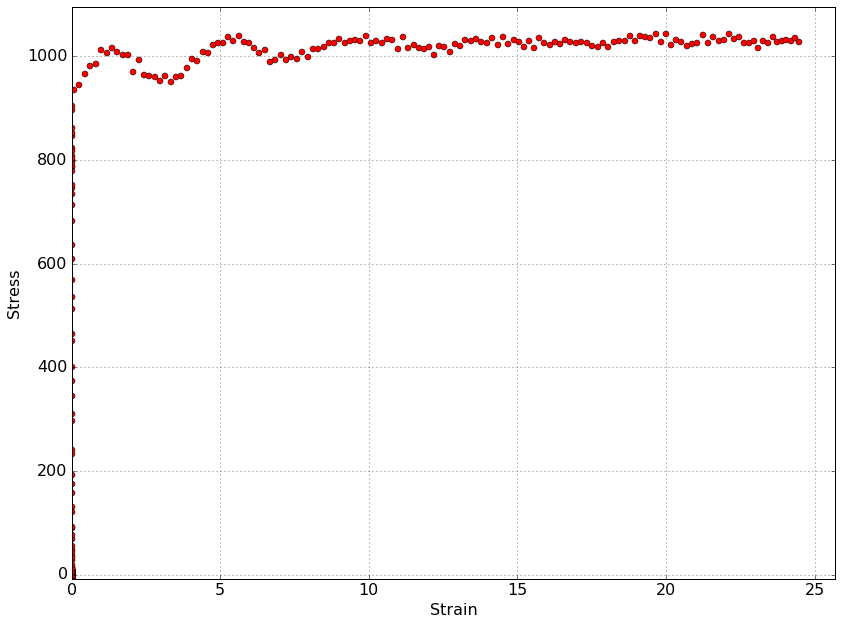

In [15]:
model = strainmodel('ref/HSRS/222').get_experimental_data()

slopes = suite.get_slopes(model)

"""Now what if we have strain vs slope"""
strainvslope = suite.combine_data(strain,slopes)
plot.plot2D(strainvslope,'Strain','Slope',marker="ro")
plot.plot2D(model,'Strain','Stress',marker="ro")